In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
## dataset file
pulsar_dataset = '/home/d.dasarathan/ds5500/projects/datasets/HTRU2/HTRU_2.csv'

In [3]:
## read dataset
df_main = pd.read_csv(pulsar_dataset, header=None)

In [4]:
## display sample dataset
df_main.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
## add column names to dataset
col_names = ['mean_int_pf', 'std_pf', 'ex_kurt_pf', 'skew_pf', 'mean_dm', 'std_dm', 'kurt_dm', 'skew_dm','label']
df_main.columns = col_names
df_main.head()

,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
df_main.label.value_counts()

0    16259
1     1639
Name: label, dtype: int64

In [7]:
df_main['label'].value_counts()/np.float(len(df_main)) * 100

0    90.842552
1     9.157448
Name: label, dtype: float64

In [8]:
#X = df_main[['mean_int_pf', 'std_pf', 'ex_kurt_pf', 'skew_pf', 'mean_dm', 'std_dm', 'kurt_dm', 'skew_dm']]
X = df_main.drop(['label'], axis=1)
y = df_main['label']

In [9]:
X.head()

,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [11]:
## split X and y into train and test sets
## 80%-20% split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
col_names = X_train.columns

----------------------------------------------------------------------------------------------------

#### Scaling Features

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train = pd.DataFrame(X_train, columns=[col_names])

In [17]:
X_test = pd.DataFrame(X_test, columns=[col_names])

------------------------------------------------------------------------------------

#### Random Forest Classifier

In [18]:
rfc = RandomForestClassifier(n_estimators = 100)

In [19]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred_rfc_train = rfc.predict(X_train)

In [21]:
y_pred_rfc_test = rfc.predict(X_test)

In [22]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_rfc_train)))

Training-set accuracy score: 1.0000


In [23]:
print("Model accuracy : ", accuracy_score(y_test, y_pred_rfc_test))

Model accuracy :  0.9798882681564246


In [24]:
## Confusion Matrix

cm = confusion_matrix(y_test, y_pred_rfc_test)

print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', cm[1,1])
print('True Negatives(TN) = ', cm[0,0])
print('False Positives(FP) = ', cm[1,0])
print('False Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[3237   22]
 [  50  271]]
True Positives(TP) =  271
True Negatives(TN) =  3237
False Positives(FP) =  50
False Negatives(FN) =  22


<AxesSubplot:>

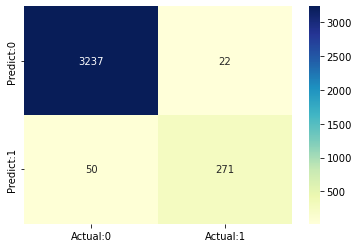

In [25]:
## Confusion matrix heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual:0', 'Actual:1'], 
                                 index=['Predict:0', 'Predict:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
print(classification_report(y_test, y_pred_rfc_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.92      0.84      0.88       321

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [27]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

In [28]:
## classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9799


In [29]:
## classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0201


In [30]:
## precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8442


In [31]:
## recall 
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9249


In [32]:
## specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9848


In [33]:
## F-1 score
f1 = 2 * (precision * recall) / (precision + recall)
print('F-1 score : {0:0.4f}'.format(f1))

F-1 score : 0.8827


-------------------------------------------------------------------------------------------------------------